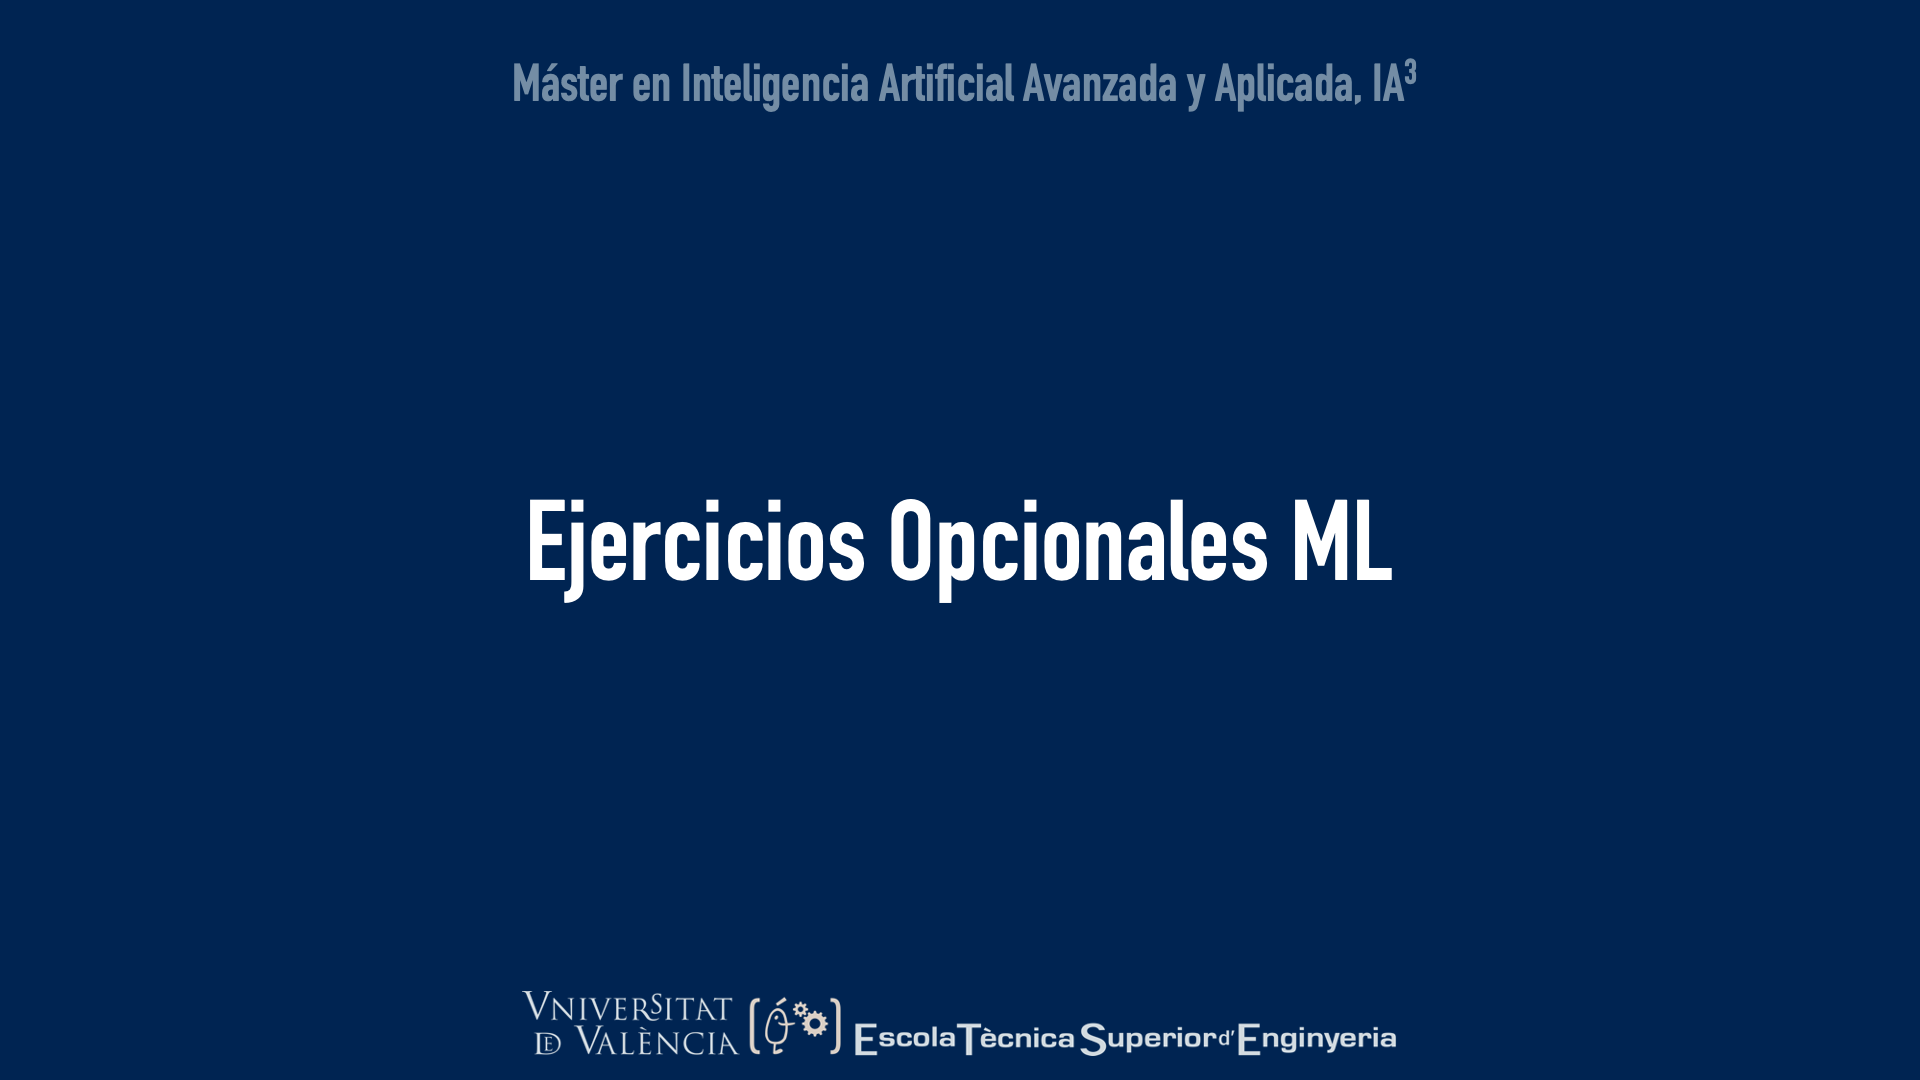

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [85]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot
from sklearn.ensemble import BaggingClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

dataframe=sns.load_dataset('penguins')

In [86]:
dataframe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [87]:
# Observamos que tenemos 344 variables y 7 características
dataframe.shape

(344, 7)

In [88]:
dataframe.isna().sum() #Comprobamos si hay algun NAN

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [89]:
# Como disponemos de bastantes variables, y no tenemos ningún criterio para rellenar un pingüino
# como macho o hembra, eliminamos los valores nulos
dataframe.dropna(how='any', inplace=True)
dataframe.reset_index(drop=True, inplace=True)
dataframe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [90]:
dataframe.isna().sum() # Volvemos a comprobar si hay algun NAN

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [91]:
dataframe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [92]:
dataframe.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


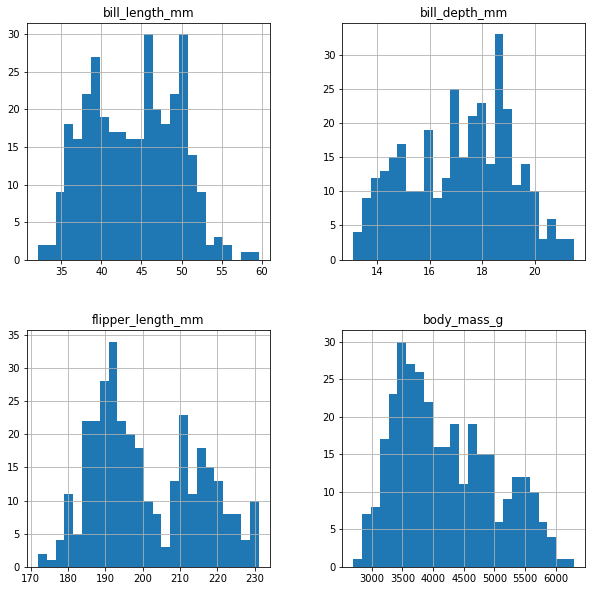

In [93]:
# Creamos un histograma para ver caracteristicas de cada variable
dataframe.hist(figsize=(10,10), bins=25)
# Mostramos la figura
pyplot.show() # No vemos signos de outlayers, ni distribución de Gaussiana. 

<Figure size 720x720 with 0 Axes>

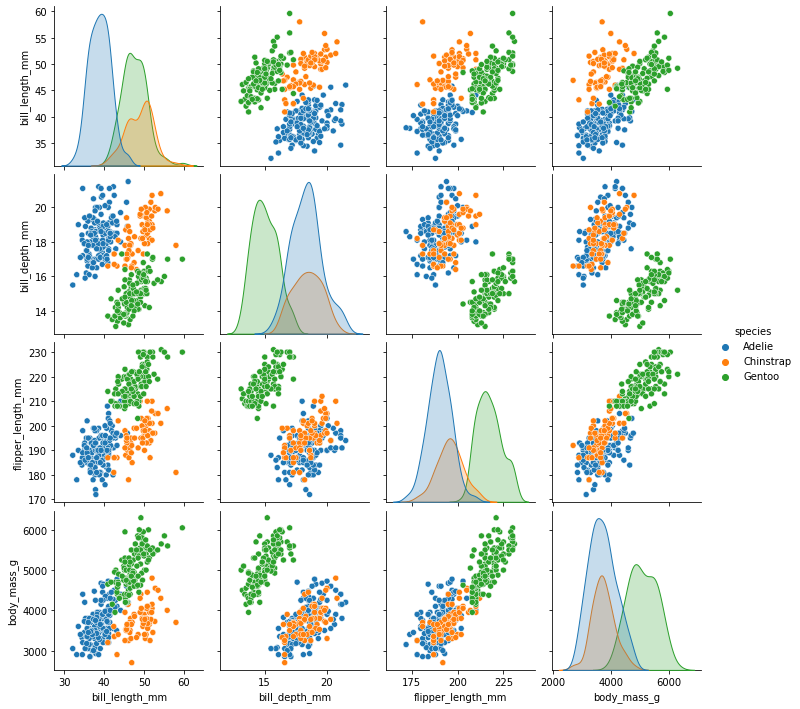

In [94]:
#Vamos a procesceder a dibujar graficos para ver si los datos tienen alguna correlación entre ellos
pyplot.figure(figsize=(10, 10))
graphics = sns.pairplot(dataframe, hue='species')
pyplot.show()#Se puede ver que Body_mass y Flipper_Length tienen una tendencia lineal

In [95]:
dataframe.corr(method='spearman')# comprobemoslo si de verdad existe algun tipo de correlación entre dos variables usando a spearman. 
#Oscila entre -1 y +1, indicándonos asociaciones negativas o positivas respectivamente, 0 cero, significa no correlación pero no independencia. Como hemos indicado anteriormente body y flipper se acercan a una asociación positiva

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.213859,0.669754,0.576480
bill_depth_mm,-0.213859,1.000000,-0.517317,-0.429283
flipper_length_mm,0.669754,-0.517317,1.000000,0.840390
body_mass_g,0.576480,-0.429283,0.840390,1.000000


In [96]:
# Hacemos un recuento de los tipos de especies que tenemos
dataframe.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [97]:
# Asignamos valores numéricos a las especies siendo:
# Adelie = 0
# Chinstrap = 1
# Gentoo = 2

dataframe['species'] = dataframe['species'].astype('category').cat.codes

In [98]:
# Asignamos valores numéricos a las islas siendo:
# Biscoe = 0
# Dream = 1
# Torgersen island = 2

dataframe['island'] = dataframe['island'].astype('category').cat.codes

In [99]:
# Asignamos valores numéricos al género:
# Female = 0
# Male = 1

dataframe['sex'] = dataframe['sex'].astype('category').cat.codes

In [100]:
y = dataframe.iloc[:,0]
X = dataframe.iloc[:,1:]

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30)

In [101]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(233, 6)
(233,)
(100, 6)
(100,)


In [102]:
warnings.filterwarnings('ignore')
#Loggic regression - Bagging
random.seed(123)

for i in range(60):
  model = LogisticRegression(multi_class='multinomial',
                             max_iter=i+30,
                             class_weight='balanced', 
                             random_state=1)
  model.fit(X_train, Y_train)
  if((model.score(X_test, Y_test)>0.96) and (model.score(X_train, Y_train)>0.98)):
    print('\nmax_iter = ',i+30)
    print('Score Train: ', model.score(X_train, Y_train))
    print('Score Test: ', model.score(X_test, Y_test))



max_iter =  81
Score Train:  0.9828326180257511
Score Test:  0.97

max_iter =  82
Score Train:  0.9871244635193133
Score Test:  0.97

max_iter =  83
Score Train:  0.9871244635193133
Score Test:  0.97

max_iter =  84
Score Train:  0.9871244635193133
Score Test:  0.97

max_iter =  85
Score Train:  0.9871244635193133
Score Test:  0.97

max_iter =  86
Score Train:  0.9828326180257511
Score Test:  0.97

max_iter =  87
Score Train:  0.9828326180257511
Score Test:  0.97

max_iter =  88
Score Train:  0.9871244635193133
Score Test:  0.98

max_iter =  89
Score Train:  0.9914163090128756
Score Test:  0.98


In [103]:
random.seed(123)

modelLR = LogisticRegression(multi_class='multinomial',
                             max_iter=78,
                             class_weight='balanced', 
                             random_state=1)
modelLR.fit(X_train, Y_train)
print('Score Train: ', modelLR.score(X_train, Y_train))
print('Score Test: ', modelLR.score(X_test, Y_test))

Score Train:  0.9613733905579399
Score Test:  0.96


In [104]:
Yts = np.array(Y_test)

In [105]:
Ypr = modelLR.predict(X_test)

In [106]:
Yts - Ypr

array([ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int8)

In [112]:
random.seed(123)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernel)):
  clf = SVC(C=1.0, 
            kernel=kernel[i], 
            #kernel='linear',
            degree=3, 
            gamma='scale', 
            coef0=0.0,
            probability=True,   
            max_iter=-1, 
            decision_function_shape='ovo', 
            random_state=1)
  clf.fit(X_train, Y_train)
  print('Score Train: ', clf.score(X_train, Y_train))
  print('Score Test: ', clf.score(X_test, Y_test))

Score Train:  1.0
Score Test:  1.0
Score Train:  0.7124463519313304
Score Test:  0.75
Score Train:  0.721030042918455
Score Test:  0.74
Score Train:  0.3133047210300429
Score Test:  0.3


In [116]:
random.seed(123)
clf = SVC(C=1.0, 
          #kernel=kernel[i], 
          kernel='linear',
          gamma='scale', 
          coef0=0.0,
          probability=True,   
          max_iter=-1, 
          decision_function_shape='ovo', 
          random_state=1)
clf.fit(X_train, Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [117]:
print('Score Train: ', clf.score(X_train, Y_train))
print('Score Test: ', clf.score(X_test, Y_test))

Score Train:  1.0
Score Test:  1.0


In [115]:
Yts = np.array(Y_test)
Yts

array([2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2,
       2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1,
       0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2], dtype=int8)

In [110]:
Ypr = clf.predict(X_test)
Ypr

array([2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2,
       2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1,
       0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2], dtype=int8)

In [111]:
Yts - Ypr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)